## Recognition of Actors using SVM


In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [6]:
chris=os.listdir("D:/Jupiter/chris")

In [7]:
boseman=os.listdir("D:/Jupiter/boseman")

In [8]:
evans=os.listdir("D:/Jupiter/evans")

In [12]:
limit=10
chris_images=[None]*limit
j=0
for i in chris:
    if(j<limit):
        chris_images[j]=imread("D:/Jupiter/chris/"+i)
        j+=1
    else:
        break

In [13]:
limit=10
boseman_images=[None]*limit
j=0
for i in chris:
    if(j<limit):
        boseman_images[j]=imread("D:/Jupiter/boseman/"+i)
        j+=1
    else:
        break

In [14]:
limit=10
evans_images=[None]*limit
j=0
for i in chris:
    if(j<limit):
        evans_images[j]=imread("D:/Jupiter/evans/"+i)
        j+=1
    else:
        break

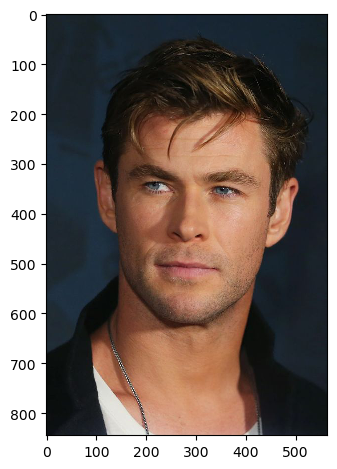

In [15]:
imshow(chris_images[1])

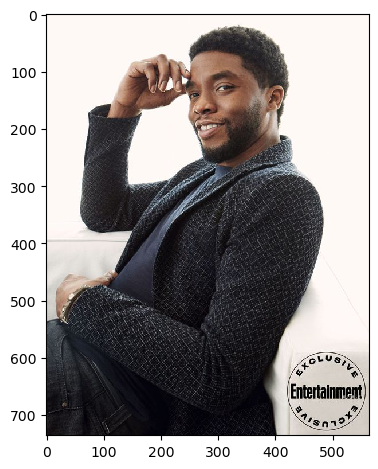

In [16]:
imshow(boseman_images[1])

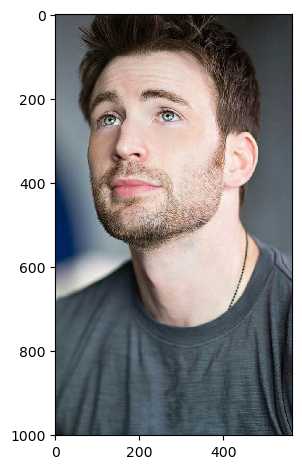

In [17]:
imshow(evans_images[1])

In [18]:
evans_images[3].shape

(750, 563, 3)

## Convert Color to Gray

rgb2gray

In [23]:
chris_gray=[None]*limit
j=0
for i in chris:
    if(j<limit):
        chris_gray[j]=rgb2gray(chris_images[j])
        j+=1
    else:
        break

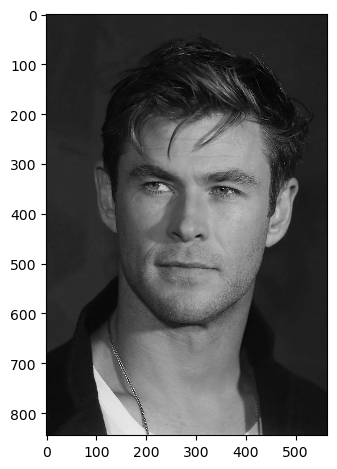

In [24]:
imshow(chris_gray[1])

In [25]:
boseman_gray=[None]*limit
j=0
for i in boseman:
    if(j<limit):
        boseman_gray[j]=rgb2gray(boseman_images[j])
        j+=1
    else:
        break

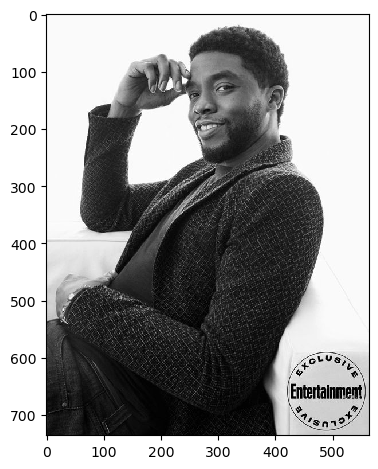

In [26]:
imshow(boseman_gray[1])

In [27]:
evans_gray=[None]*limit
j=0
for i in evans:
    if(j<limit):
        evans_gray[j]=rgb2gray(evans_images[j])
        j+=1
    else:
        break

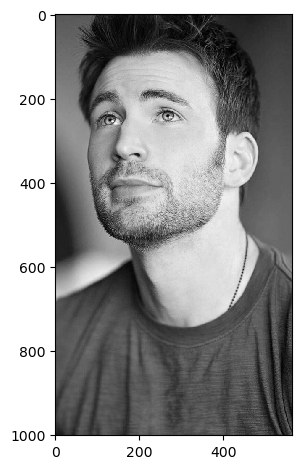

In [28]:
imshow(evans_gray[1])

In [29]:
evans_gray[3].shape

(750, 563)

In [31]:
for j in range(10):
    c=chris_gray[j]
    chris_gray[j]=resize(c,(512,512))

In [32]:
for j in range(10):
    c=boseman_gray[j]
    boseman_gray[j]=resize(c,(512,512))

In [33]:
for j in range(10):
    c=evans_gray[j]
    evans_gray[j]=resize(c,(512,512))

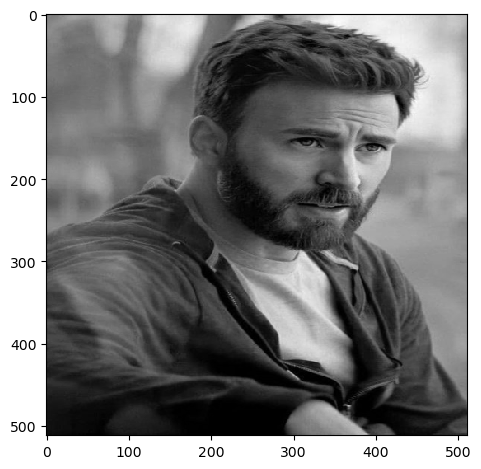

In [34]:
imshow(evans_gray[2])

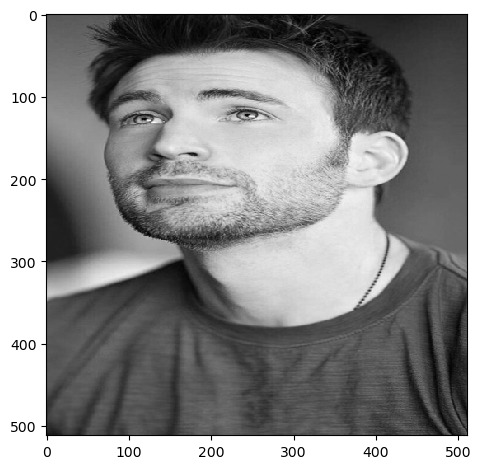

In [35]:
imshow(evans_gray[1])

In [36]:
evans_gray[3].shape

(512, 512)

## Image Matrix to Vector Conversion

In [37]:
len_of_images_chris=len(chris_gray)
len_of_images_boseman=len(boseman_gray)
len_of_images_evans=len(evans_gray)

In [38]:
image_size_chris=chris_gray[1].shape

In [39]:
image_size_chris

(512, 512)

In [41]:
image_size_boseman=boseman_gray[1].shape
image_size_evans=evans_gray[1].shape

## Create a variable flatten size which contains product of (512,512)

In [42]:
flatten_size_chris=image_size_chris[0]*image_size_chris[1]

In [43]:
flatten_size_chris

262144

In [44]:
flatten_size_boseman=image_size_boseman[0]*image_size_boseman[1]
flatten_size_boseman

262144

In [48]:
flatten_size_evans=image_size_evans[0]*image_size_evans[1]
flatten_size_evans

262144

## Now flatten image from 512,512 matrix to 266144,1 vector

In [49]:
for i in range(len_of_images_chris):
    chris_gray[i]=np.ndarray.flatten(chris_gray[i]).reshape(flatten_size_chris,1)

In [52]:
chris_gray=np.dstack(chris_gray)

In [53]:
for i in range(len_of_images_boseman):
    boseman_gray[i]=np.ndarray.flatten(boseman_gray[i]).reshape(flatten_size_boseman,1)

In [54]:
boseman_gray=np.dstack(boseman_gray)

In [55]:
for i in range(len_of_images_evans):
    evans_gray[i]=np.ndarray.flatten(evans_gray[i]).reshape(flatten_size_evans,1)

In [56]:
evans_gray=np.dstack(evans_gray)

In [71]:
chris_gray=np.rollaxis(chris_gray,axis=2,start=0)

In [75]:
chris_gray.shape

(1, 10, 262144)

In [73]:
boseman_gray=np.rollaxis(boseman_gray,axis=2,start=0)
boseman_gray.shape

(10, 262144, 1)

In [74]:
evans_gray=np.rollaxis(evans_gray,axis=2,start=0)
evans_gray.shape

(10, 262144, 1)

In [76]:
chris_gray=chris_gray.reshape(len_of_images_chris,flatten_size_chris)

In [77]:
chris_gray.shape

(10, 262144)

In [78]:
chris_data=pd.DataFrame(chris_gray)

In [79]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.562602,0.561611,0.561611,...,0.166099,0.153763,0.145317,0.139984,0.141439,0.141426,0.139525,0.134448,0.132846,0.132846
1,0.127248,0.127854,0.131171,0.131180,0.131175,0.128984,0.127251,0.133221,0.135090,0.135090,...,0.089053,0.087800,0.087177,0.085184,0.084604,0.083878,0.085873,0.086974,0.086974,0.086974
2,0.567853,0.351446,0.213215,0.224188,0.237706,0.213909,0.210734,0.220778,0.221116,0.224137,...,0.475091,0.483195,0.488449,0.495756,0.501807,0.506188,0.512317,0.518623,0.526267,0.531185
3,0.254196,0.258508,0.262823,0.268506,0.275067,0.280445,0.283408,0.289263,0.294564,0.301689,...,0.107303,0.106902,0.104360,0.103389,0.103382,0.101938,0.100765,0.100490,0.100399,0.100399
4,0.655530,0.650418,0.639963,0.629956,0.623415,0.617316,0.610954,0.604582,0.598209,0.593626,...,0.169278,0.179055,0.164716,0.140897,0.181078,0.212982,0.195734,0.196303,0.208812,0.204332
5,0.861322,0.861322,0.860765,0.859082,0.859082,0.859082,0.859082,0.862223,0.863287,0.863287,...,0.217727,0.214118,0.211339,0.212496,0.216394,0.220707,0.225019,0.223441,0.222464,0.226191
6,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.720462,0.720778,0.724561,...,0.160729,0.149724,0.151932,0.148987,0.142406,0.146617,0.162217,0.161363,0.142429,0.124554
7,0.822057,0.824732,0.826511,0.828928,0.829768,0.829040,0.826736,0.828833,0.829768,0.829768,...,0.711241,0.710972,0.709269,0.708383,0.706663,0.706663,0.712156,0.715186,0.715186,0.715186
8,0.180549,0.180387,0.178489,0.175184,0.174829,0.176639,0.178940,0.164876,0.163670,0.168912,...,0.468741,0.463886,0.457116,0.457478,0.460383,0.465298,0.467509,0.469332,0.470778,0.476360
9,0.185203,0.184121,0.184121,0.184121,0.184121,0.184121,0.182844,0.193376,0.194632,0.194171,...,0.143649,0.144195,0.142657,0.143664,0.144671,0.146831,0.148775,0.150663,0.154519,0.155976


In [81]:
boseman_gray=boseman_gray.reshape(len_of_images_boseman,flatten_size_boseman)
boseman_gray.shape
boseman_data=pd.DataFrame(boseman_gray)
boseman_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.776401,0.780690,0.784841,0.786444,0.780551,0.772020,0.766100,0.782606,0.787994,0.784375,...,0.686434,0.682843,0.681908,0.677588,0.673019,0.670404,0.667914,0.663814,0.659544,0.655414
1,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,...,0.807463,0.805680,0.798715,0.793063,0.784802,0.778771,0.785270,0.786916,0.779273,0.770633
2,0.430656,0.383452,0.389780,0.381448,0.356841,0.375683,0.386193,0.393001,0.406597,0.481636,...,0.648019,0.647066,0.628391,0.629532,0.650226,0.669263,0.664903,0.655809,0.658952,0.671767
3,0.133110,0.132524,0.129189,0.129189,0.129189,0.131337,0.133110,0.130181,0.129189,0.132900,...,0.578127,0.579271,0.579271,0.577890,0.575352,0.573188,0.568879,0.567629,0.566639,0.565310
4,0.875946,0.876532,0.879868,0.879868,0.879868,0.882016,0.883789,0.880860,0.879868,0.879879,...,0.704219,0.704819,0.708129,0.706751,0.704219,0.702056,0.700290,0.697341,0.696365,0.696365
5,0.172598,0.173055,0.175600,0.176994,0.179521,0.179521,0.181503,0.177950,0.176519,0.176519,...,0.054292,0.062395,0.065781,0.067114,0.073164,0.081804,0.089117,0.097025,0.105664,0.109709
6,0.773177,0.772963,0.768153,0.762532,0.757594,0.752769,0.749553,0.743760,0.741791,0.736189,...,0.385497,0.378587,0.366978,0.368182,0.379415,0.388440,0.419736,0.429333,0.615148,0.263821
7,0.476514,0.480236,0.478245,0.468211,0.455251,0.446673,0.445180,0.436341,0.433848,0.438028,...,0.606054,0.609826,0.602139,0.601323,0.600042,0.586626,0.571875,0.562109,0.553561,0.548302
8,0.036568,0.037193,0.039619,0.038602,0.036757,0.036868,0.038845,0.037031,0.038630,0.039214,...,0.021538,0.020789,0.020498,0.019010,0.018485,0.018518,0.017486,0.016916,0.016916,0.016916
9,0.282911,0.282513,0.279973,0.280390,0.282916,0.285106,0.287700,0.290133,0.290754,0.290754,...,0.338353,0.275924,0.227293,0.190337,0.181609,0.206656,0.243086,0.282973,0.315524,0.318446


In [83]:
evans_gray=evans_gray.reshape(len_of_images_evans,flatten_size_evans)
evans_gray.shape
evans_data=pd.DataFrame(evans_gray)
evans_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,...,0.060278,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043
1,0.193649,0.193649,0.193649,0.193649,0.193649,0.193649,0.193649,0.200995,0.203143,0.199503,...,0.144955,0.170429,0.233996,0.260500,0.260449,0.270855,0.354311,0.375027,0.375345,0.395047
2,0.513468,0.498874,0.481103,0.474614,0.473131,0.475470,0.476859,0.468120,0.465872,0.469476,...,0.181426,0.181681,0.181965,0.177236,0.174958,0.180224,0.189355,0.200899,0.203821,0.203821
3,0.042869,0.042954,0.042458,0.039513,0.039513,0.039513,0.039696,0.039796,0.039796,0.039796,...,0.043975,0.036815,0.036009,0.045878,0.049005,0.047356,0.049317,0.042216,0.039513,0.039513
4,0.458949,0.460282,0.467779,0.472099,0.475468,0.476151,0.475902,0.481744,0.483571,0.479788,...,0.200798,0.200570,0.198197,0.194452,0.192902,0.193423,0.189406,0.192496,0.166806,0.396195
5,0.462299,0.473856,0.482970,0.482020,0.478526,0.486687,0.505012,0.518292,0.518070,0.510808,...,0.118572,0.117560,0.109421,0.114703,0.122811,0.122464,0.112514,0.113275,0.097336,0.755139
6,0.339197,0.345983,0.358413,0.363429,0.360763,0.358757,0.359394,0.361020,0.357858,0.338029,...,0.032663,0.030824,0.028805,0.023985,0.018065,0.018801,0.026288,0.035619,0.039255,0.037864
7,0.026754,0.030291,0.031237,0.034018,0.036622,0.039716,0.039716,0.037175,0.031556,0.030792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.559398,0.561225,0.546205,0.535346,0.506186,0.486270,0.528412,0.530593,0.536850,0.553772,...,0.488435,0.485874,0.466968,0.358593,0.176585,0.126738,0.182887,0.234486,0.277173,0.311238
9,0.235961,0.239442,0.243116,0.246041,0.244249,0.240355,0.236688,0.233657,0.225815,0.215203,...,0.478774,0.491093,0.497388,0.497968,0.499363,0.501542,0.509934,0.514939,0.515392,0.513163


In [84]:
chris_data["label"]="chris"

In [85]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.562602,0.561611,0.561611,...,0.153763,0.145317,0.139984,0.141439,0.141426,0.139525,0.134448,0.132846,0.132846,chris
1,0.127248,0.127854,0.131171,0.131180,0.131175,0.128984,0.127251,0.133221,0.135090,0.135090,...,0.087800,0.087177,0.085184,0.084604,0.083878,0.085873,0.086974,0.086974,0.086974,chris
2,0.567853,0.351446,0.213215,0.224188,0.237706,0.213909,0.210734,0.220778,0.221116,0.224137,...,0.483195,0.488449,0.495756,0.501807,0.506188,0.512317,0.518623,0.526267,0.531185,chris
3,0.254196,0.258508,0.262823,0.268506,0.275067,0.280445,0.283408,0.289263,0.294564,0.301689,...,0.106902,0.104360,0.103389,0.103382,0.101938,0.100765,0.100490,0.100399,0.100399,chris
4,0.655530,0.650418,0.639963,0.629956,0.623415,0.617316,0.610954,0.604582,0.598209,0.593626,...,0.179055,0.164716,0.140897,0.181078,0.212982,0.195734,0.196303,0.208812,0.204332,chris
5,0.861322,0.861322,0.860765,0.859082,0.859082,0.859082,0.859082,0.862223,0.863287,0.863287,...,0.214118,0.211339,0.212496,0.216394,0.220707,0.225019,0.223441,0.222464,0.226191,chris
6,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.720462,0.720778,0.724561,...,0.149724,0.151932,0.148987,0.142406,0.146617,0.162217,0.161363,0.142429,0.124554,chris
7,0.822057,0.824732,0.826511,0.828928,0.829768,0.829040,0.826736,0.828833,0.829768,0.829768,...,0.710972,0.709269,0.708383,0.706663,0.706663,0.712156,0.715186,0.715186,0.715186,chris
8,0.180549,0.180387,0.178489,0.175184,0.174829,0.176639,0.178940,0.164876,0.163670,0.168912,...,0.463886,0.457116,0.457478,0.460383,0.465298,0.467509,0.469332,0.470778,0.476360,chris
9,0.185203,0.184121,0.184121,0.184121,0.184121,0.184121,0.182844,0.193376,0.194632,0.194171,...,0.144195,0.142657,0.143664,0.144671,0.146831,0.148775,0.150663,0.154519,0.155976,chris


In [86]:
boseman_data["label"]="boseman"
boseman_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.776401,0.780690,0.784841,0.786444,0.780551,0.772020,0.766100,0.782606,0.787994,0.784375,...,0.682843,0.681908,0.677588,0.673019,0.670404,0.667914,0.663814,0.659544,0.655414,boseman
1,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,0.979506,...,0.805680,0.798715,0.793063,0.784802,0.778771,0.785270,0.786916,0.779273,0.770633,boseman
2,0.430656,0.383452,0.389780,0.381448,0.356841,0.375683,0.386193,0.393001,0.406597,0.481636,...,0.647066,0.628391,0.629532,0.650226,0.669263,0.664903,0.655809,0.658952,0.671767,boseman
3,0.133110,0.132524,0.129189,0.129189,0.129189,0.131337,0.133110,0.130181,0.129189,0.132900,...,0.579271,0.579271,0.577890,0.575352,0.573188,0.568879,0.567629,0.566639,0.565310,boseman
4,0.875946,0.876532,0.879868,0.879868,0.879868,0.882016,0.883789,0.880860,0.879868,0.879879,...,0.704819,0.708129,0.706751,0.704219,0.702056,0.700290,0.697341,0.696365,0.696365,boseman
5,0.172598,0.173055,0.175600,0.176994,0.179521,0.179521,0.181503,0.177950,0.176519,0.176519,...,0.062395,0.065781,0.067114,0.073164,0.081804,0.089117,0.097025,0.105664,0.109709,boseman
6,0.773177,0.772963,0.768153,0.762532,0.757594,0.752769,0.749553,0.743760,0.741791,0.736189,...,0.378587,0.366978,0.368182,0.379415,0.388440,0.419736,0.429333,0.615148,0.263821,boseman
7,0.476514,0.480236,0.478245,0.468211,0.455251,0.446673,0.445180,0.436341,0.433848,0.438028,...,0.609826,0.602139,0.601323,0.600042,0.586626,0.571875,0.562109,0.553561,0.548302,boseman
8,0.036568,0.037193,0.039619,0.038602,0.036757,0.036868,0.038845,0.037031,0.038630,0.039214,...,0.020789,0.020498,0.019010,0.018485,0.018518,0.017486,0.016916,0.016916,0.016916,boseman
9,0.282911,0.282513,0.279973,0.280390,0.282916,0.285106,0.287700,0.290133,0.290754,0.290754,...,0.275924,0.227293,0.190337,0.181609,0.206656,0.243086,0.282973,0.315524,0.318446,boseman


In [87]:
evans_data["label"]="evans"
evans_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,...,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,evans
1,0.193649,0.193649,0.193649,0.193649,0.193649,0.193649,0.193649,0.200995,0.203143,0.199503,...,0.170429,0.233996,0.260500,0.260449,0.270855,0.354311,0.375027,0.375345,0.395047,evans
2,0.513468,0.498874,0.481103,0.474614,0.473131,0.475470,0.476859,0.468120,0.465872,0.469476,...,0.181681,0.181965,0.177236,0.174958,0.180224,0.189355,0.200899,0.203821,0.203821,evans
3,0.042869,0.042954,0.042458,0.039513,0.039513,0.039513,0.039696,0.039796,0.039796,0.039796,...,0.036815,0.036009,0.045878,0.049005,0.047356,0.049317,0.042216,0.039513,0.039513,evans
4,0.458949,0.460282,0.467779,0.472099,0.475468,0.476151,0.475902,0.481744,0.483571,0.479788,...,0.200570,0.198197,0.194452,0.192902,0.193423,0.189406,0.192496,0.166806,0.396195,evans
5,0.462299,0.473856,0.482970,0.482020,0.478526,0.486687,0.505012,0.518292,0.518070,0.510808,...,0.117560,0.109421,0.114703,0.122811,0.122464,0.112514,0.113275,0.097336,0.755139,evans
6,0.339197,0.345983,0.358413,0.363429,0.360763,0.358757,0.359394,0.361020,0.357858,0.338029,...,0.030824,0.028805,0.023985,0.018065,0.018801,0.026288,0.035619,0.039255,0.037864,evans
7,0.026754,0.030291,0.031237,0.034018,0.036622,0.039716,0.039716,0.037175,0.031556,0.030792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,evans
8,0.559398,0.561225,0.546205,0.535346,0.506186,0.486270,0.528412,0.530593,0.536850,0.553772,...,0.485874,0.466968,0.358593,0.176585,0.126738,0.182887,0.234486,0.277173,0.311238,evans
9,0.235961,0.239442,0.243116,0.246041,0.244249,0.240355,0.236688,0.233657,0.225815,0.215203,...,0.491093,0.497388,0.497968,0.499363,0.501542,0.509934,0.514939,0.515392,0.513163,evans


In [88]:
actor=pd.concat([chris_data,boseman_data,evans_data])

In [89]:
actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.565532,0.562602,0.561611,0.561611,...,0.153763,0.145317,0.139984,0.141439,0.141426,0.139525,0.134448,0.132846,0.132846,chris
1,0.127248,0.127854,0.131171,0.131180,0.131175,0.128984,0.127251,0.133221,0.135090,0.135090,...,0.087800,0.087177,0.085184,0.084604,0.083878,0.085873,0.086974,0.086974,0.086974,chris
2,0.567853,0.351446,0.213215,0.224188,0.237706,0.213909,0.210734,0.220778,0.221116,0.224137,...,0.483195,0.488449,0.495756,0.501807,0.506188,0.512317,0.518623,0.526267,0.531185,chris
3,0.254196,0.258508,0.262823,0.268506,0.275067,0.280445,0.283408,0.289263,0.294564,0.301689,...,0.106902,0.104360,0.103389,0.103382,0.101938,0.100765,0.100490,0.100399,0.100399,chris
4,0.655530,0.650418,0.639963,0.629956,0.623415,0.617316,0.610954,0.604582,0.598209,0.593626,...,0.179055,0.164716,0.140897,0.181078,0.212982,0.195734,0.196303,0.208812,0.204332,chris
5,0.861322,0.861322,0.860765,0.859082,0.859082,0.859082,0.859082,0.862223,0.863287,0.863287,...,0.214118,0.211339,0.212496,0.216394,0.220707,0.225019,0.223441,0.222464,0.226191,chris
6,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.720462,0.720778,0.724561,...,0.149724,0.151932,0.148987,0.142406,0.146617,0.162217,0.161363,0.142429,0.124554,chris
7,0.822057,0.824732,0.826511,0.828928,0.829768,0.829040,0.826736,0.828833,0.829768,0.829768,...,0.710972,0.709269,0.708383,0.706663,0.706663,0.712156,0.715186,0.715186,0.715186,chris
8,0.180549,0.180387,0.178489,0.175184,0.174829,0.176639,0.178940,0.164876,0.163670,0.168912,...,0.463886,0.457116,0.457478,0.460383,0.465298,0.467509,0.469332,0.470778,0.476360,chris
9,0.185203,0.184121,0.184121,0.184121,0.184121,0.184121,0.182844,0.193376,0.194632,0.194171,...,0.144195,0.142657,0.143664,0.144671,0.146831,0.148775,0.150663,0.154519,0.155976,chris


In [90]:
from sklearn.utils import shuffle

In [91]:
hollywood_indexed = shuffle(actor).reset_index()

In [92]:
hollywood_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,6,0.773177,0.772963,0.768153,0.762532,0.757594,0.752769,0.749553,0.743760,0.741791,...,0.378587,0.366978,0.368182,0.379415,0.388440,0.419736,0.429333,0.615148,0.263821,boseman
1,9,0.185203,0.184121,0.184121,0.184121,0.184121,0.184121,0.182844,0.193376,0.194632,...,0.144195,0.142657,0.143664,0.144671,0.146831,0.148775,0.150663,0.154519,0.155976,chris
2,6,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.720462,0.720778,...,0.149724,0.151932,0.148987,0.142406,0.146617,0.162217,0.161363,0.142429,0.124554,chris
3,7,0.026754,0.030291,0.031237,0.034018,0.036622,0.039716,0.039716,0.037175,0.031556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,evans
4,5,0.861322,0.861322,0.860765,0.859082,0.859082,0.859082,0.859082,0.862223,0.863287,...,0.214118,0.211339,0.212496,0.216394,0.220707,0.225019,0.223441,0.222464,0.226191,chris
5,2,0.513468,0.498874,0.481103,0.474614,0.473131,0.475470,0.476859,0.468120,0.465872,...,0.181681,0.181965,0.177236,0.174958,0.180224,0.189355,0.200899,0.203821,0.203821,evans
6,5,0.462299,0.473856,0.482970,0.482020,0.478526,0.486687,0.505012,0.518292,0.518070,...,0.117560,0.109421,0.114703,0.122811,0.122464,0.112514,0.113275,0.097336,0.755139,evans
7,8,0.036568,0.037193,0.039619,0.038602,0.036757,0.036868,0.038845,0.037031,0.038630,...,0.020789,0.020498,0.019010,0.018485,0.018518,0.017486,0.016916,0.016916,0.016916,boseman
8,0,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,...,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,evans
9,3,0.042869,0.042954,0.042458,0.039513,0.039513,0.039513,0.039696,0.039796,0.039796,...,0.036815,0.036009,0.045878,0.049005,0.047356,0.049317,0.042216,0.039513,0.039513,evans


In [93]:
hollywood_actors=hollywood_indexed.drop(['index'],axis=1)

In [94]:
hollywood_actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.773177,0.772963,0.768153,0.762532,0.757594,0.752769,0.749553,0.743760,0.741791,0.736189,...,0.378587,0.366978,0.368182,0.379415,0.388440,0.419736,0.429333,0.615148,0.263821,boseman
1,0.185203,0.184121,0.184121,0.184121,0.184121,0.184121,0.182844,0.193376,0.194632,0.194171,...,0.144195,0.142657,0.143664,0.144671,0.146831,0.148775,0.150663,0.154519,0.155976,chris
2,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.719451,0.720462,0.720778,0.724561,...,0.149724,0.151932,0.148987,0.142406,0.146617,0.162217,0.161363,0.142429,0.124554,chris
3,0.026754,0.030291,0.031237,0.034018,0.036622,0.039716,0.039716,0.037175,0.031556,0.030792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,evans
4,0.861322,0.861322,0.860765,0.859082,0.859082,0.859082,0.859082,0.862223,0.863287,0.863287,...,0.214118,0.211339,0.212496,0.216394,0.220707,0.225019,0.223441,0.222464,0.226191,chris
5,0.513468,0.498874,0.481103,0.474614,0.473131,0.475470,0.476859,0.468120,0.465872,0.469476,...,0.181681,0.181965,0.177236,0.174958,0.180224,0.189355,0.200899,0.203821,0.203821,evans
6,0.462299,0.473856,0.482970,0.482020,0.478526,0.486687,0.505012,0.518292,0.518070,0.510808,...,0.117560,0.109421,0.114703,0.122811,0.122464,0.112514,0.113275,0.097336,0.755139,evans
7,0.036568,0.037193,0.039619,0.038602,0.036757,0.036868,0.038845,0.037031,0.038630,0.039214,...,0.020789,0.020498,0.019010,0.018485,0.018518,0.017486,0.016916,0.016916,0.016916,boseman
8,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,...,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,0.063043,evans
9,0.042869,0.042954,0.042458,0.039513,0.039513,0.039513,0.039696,0.039796,0.039796,0.039796,...,0.036815,0.036009,0.045878,0.049005,0.047356,0.049317,0.042216,0.039513,0.039513,evans


In [95]:
hollywood_actors.to_csv("D:/actors.csv")

In [96]:
x=actor.values[:,:-1]

In [97]:
y=actor.values[:,-1]

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
from sklearn import svm

In [101]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [102]:
y_pred =clf.predict(x_test)
y_pred

array(['chris', 'chris', 'chris', 'chris', 'chris', 'chris'], dtype=object)

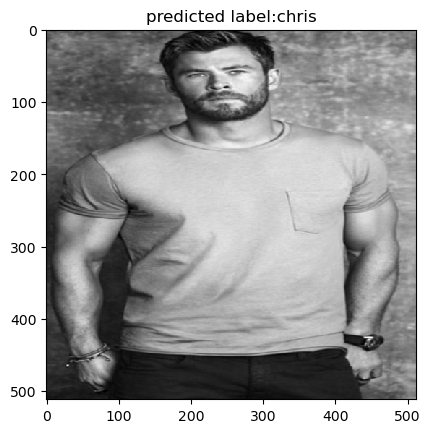

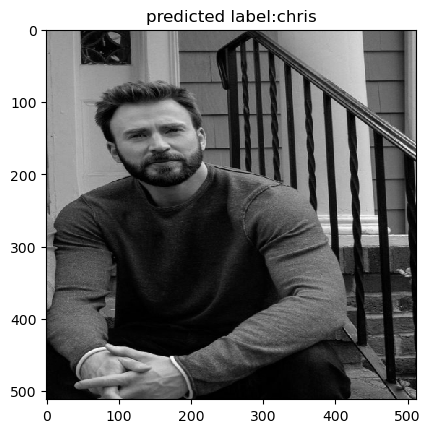

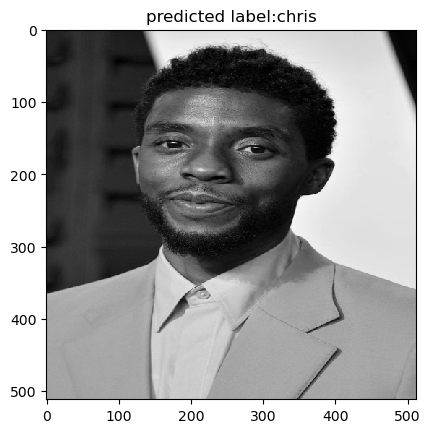

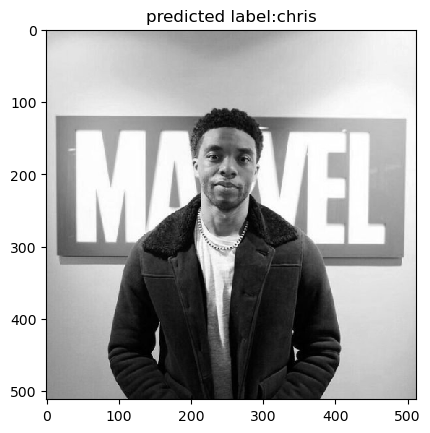

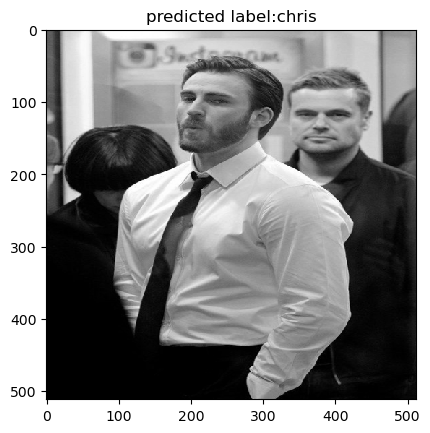

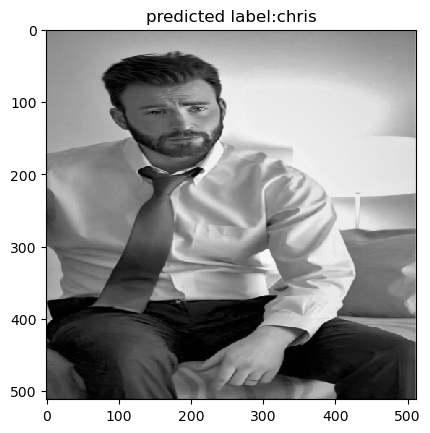

In [103]:
for i in range(6):
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [104]:
from sklearn import metrics

In [105]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [106]:
accuracy

0.16666666666666666

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test,y_pred)

array([[0, 2, 0],
       [0, 1, 0],
       [0, 3, 0]], dtype=int64)